# Machine Learning Final project: House Prices

This was an end project for the course 'Machine Learning' at NOVA SBE.

## What business problem are you solving?
- Please state clearly what business problem are you solving. 
        
        The business problem we are solving is predicting house rental prices in the USA based on property details and descriptions from Craigslist listings.
- Elaborate why is this a relevant problem, and what can you do with the model output to create business value, i.e., how is the model output actionable. 

        This is a relevant problem as the accurate prediction of house rental prices is essential in many industries such as real estate, bank lending, and insurance. In real estate, accurate price predictions help sellers to list their properties at fair market value, which can lead to faster sales and higher profits. On the other hand, for buyers, it helps them to make informed decisions about their purchase, and for lenders, it helps them to determine the appropriate loan amount.
        With the model output, we can create business value by using it to develop pricing strategies for real estate agents, property managers, and homeowners. For example, real estate agents can use the model output to optimize the price of a property based on various features such as the type, location, and the number of rooms. Property managers can use the model output to set rent prices based on market trends and property features, and homeowners can use it to determine the rent price for their property when renting it out. Overall, the accurate prediction of house rental prices can lead to better decision-making and increased profitability for businesses and individuals in the real estate industry.

## What is the machine learning problem that you are solving?

        The ML problem is a regression problem where the goal is to build a model that predicts rental prices based on property details and descriptions given, and not to generate a ranked list or detect anomalies, nor do clustering to find hidden patterns. Our target is to predict the rental price.

## Data exploration and preparation  

#### Import Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

#### Load Dataset

In [54]:
df= pd.read_csv("housing.csv")

#### Data Preparation and Exploration

In [55]:
print(f"The data contains {df.shape[0]} instances and {df.shape[1]} features.")

The data contains 100000 instances and 22 features.


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       100000 non-null  int64  
 1   url                      100000 non-null  object 
 2   region                   100000 non-null  object 
 3   region_url               100000 non-null  object 
 4   price                    100000 non-null  int64  
 5   type                     100000 non-null  object 
 6   sqfeet                   100000 non-null  int64  
 7   beds                     100000 non-null  int64  
 8   baths                    100000 non-null  float64
 9   cats_allowed             100000 non-null  int64  
 10  dogs_allowed             100000 non-null  int64  
 11  smoking_allowed          100000 non-null  int64  
 12  wheelchair_access        100000 non-null  int64  
 13  electric_vehicle_charge  100000 non-null  int64  
 14  comes

In [57]:
df.head(5)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037237364,https://wenatchee.craigslist.org/apa/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,1240,apartment,500,1,1.0,1,...,0,0,0,w/d in unit,NaN,https://images.craigslist.org/01111_eMDX7sfwby...,Call Today! show contact info 600 Riverside...,47.4329,-120.3150,wa
1,7042021271,https://oklahomacity.craigslist.org/apa/d/okla...,oklahoma city,https://oklahomacity.craigslist.org,699,apartment,910,2,1.5,1,...,0,0,0,laundry on site,NaN,https://images.craigslist.org/00H0H_32a8DaXJGf...,Aspen Walk Apartments KEY FEATURES Bedrooms: 1...,35.4110,-97.4388,ok
2,7040606147,https://reading.craigslist.org/apa/d/reading-s...,reading,https://reading.craigslist.org,845,apartment,850,3,1.0,1,...,0,0,0,NaN,street parking,https://images.craigslist.org/00L0L_jiNk8TBjzi...,"Welcome to this spacious 2-3 bedroom, 1 bathro...",40.3489,-75.9136,pa
3,7037041285,https://sanantonio.craigslist.org/apa/d/san-an...,san antonio,https://sanantonio.craigslist.org,1349,house,2220,4,2.5,1,...,0,0,0,w/d hookups,attached garage,https://images.craigslist.org/01111_fvDkTSAdyQ...,"Save your $$$, call now! show contact info e...",29.5187,-98.7645,tx
4,7035727439,https://cleveland.craigslist.org/apa/d/clevela...,cleveland,https://cleveland.craigslist.org,755,house,1400,3,1.5,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00n0n_rMf9w1FCI5...,CALL US AT show contact info HOUSE IS UNDER...,41.4416,-81.5486,oh


In [58]:
df.duplicated().sum()
print("Number of duplicate rows: ", df.duplicated().sum())

Number of duplicate rows:  0


In [59]:
print(f"It contains {df.shape[1]} features. \n")
print("These are the features and its types: \n", df.dtypes)

It contains 22 features. 

These are the features and its types: 
 id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object


In [60]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
id,100000.0,7.040972e+09,8802039.60,7.004010e+09,7.035981e+09,7.043324e+09,7.048406e+09,7.051291e+09
price,100000.0,1.579440e+03,64330.69,0.000000e+00,8.050000e+02,1.034000e+03,1.395000e+03,1.850200e+07
sqfeet,100000.0,1.102970e+03,26903.90,0.000000e+00,7.500000e+02,9.490000e+02,1.149000e+03,8.388607e+06
beds,100000.0,1.900000e+00,3.28,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+03
baths,100000.0,1.480000e+00,0.60,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.500000e+01
cats_allowed,100000.0,7.300000e-01,0.45,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
dogs_allowed,100000.0,7.100000e-01,0.45,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
smoking_allowed,100000.0,7.300000e-01,0.44,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
wheelchair_access,100000.0,8.000000e-02,0.28,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
electric_vehicle_charge,100000.0,1.000000e-02,0.11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [61]:
for column in df.columns:    
    if df[column].dtype.name == 'object': 
        
        categories = df[column].value_counts() 

        print(f"Column '{column}' is categorical with {len(categories)} categories;")

Column 'url' is categorical with 100000 categories;
Column 'region' is categorical with 404 categories;
Column 'region_url' is categorical with 413 categories;
Column 'type' is categorical with 11 categories;
Column 'laundry_options' is categorical with 5 categories;
Column 'parking_options' is categorical with 7 categories;
Column 'image_url' is categorical with 66610 categories;
Column 'description' is categorical with 81144 categories;
Column 'state' is categorical with 51 categories;


In [62]:
print(df.isnull().sum())

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            20677
parking_options            36639
image_url                      0
description                    2
lat                          495
long                         495
state                          0
dtype: int64


We can see there are a missing values in the dataset, with the laundry_options and parking_options columns having the most missing values. Additionally, the description, lat, and long columns have a small number of missing values. We can handle these missing values using imputation techniques or by removing the affected rows from the dataset which we did afterwards.

But first, let's take a look on the values in the parking_options and laundry_options columns:

In [63]:
print('Parking:',df['parking_options'].unique())
print('Laundry:',df['parking_options'].unique())

Parking: [nan 'street parking' 'attached garage' 'detached garage' 'carport'
 'off-street parking' 'no parking' 'valet parking']
Laundry: [nan 'street parking' 'attached garage' 'detached garage' 'carport'
 'off-street parking' 'no parking' 'valet parking']


Let's transform the text in the description column to lowercase:

In [64]:
df['description'] = df['description'].str.lower()

In [65]:
# define the function
def impute_column_from_description(df, col):
    # get the list of unique non-null values in the column
    col_list = df[col].dropna().unique().tolist()

    # filter the DataFrame to rows with missing values in the column
    filtered_df = df[df[col].isna()].copy()

    # use regular expressions to extract values from the 'description' column
    filtered_df[col] = filtered_df['description'].str.extract(
        f"({'|'.join(col_list)})", flags=re.IGNORECASE)

    # update the original DataFrame with the imputed values
    df.update(filtered_df)

    # print the unique values and number of missing values
    print(df[col].unique())
    print(df[col].isnull().sum())

# call the function for 'parking_options'
impute_column_from_description(df, 'parking_options')

# call the function for 'laundry_options'
impute_column_from_description(df, 'laundry_options')

[nan 'street parking' 'attached garage' 'detached garage' 'carport'
 'off-street parking' 'no parking' 'valet parking']
32677
['w/d in unit' 'laundry on site' nan 'w/d hookups' 'laundry in bldg'
 'no laundry on site']
20540


Above, we first created a list of unique non-null values in parking_options and laundry_options and filters the DataFrame to retain only the rows with missing values in the specified column. Then we used regular expressions to extract the values from the 'description' column that match the list of unique non-null values in the specified column, and replaced the missing values in the specified column with these extracted values. Any remaining missing values are replaced with the string 'unknown'. For example, if the specified column is 'parking_options' and the unique non-null values in this column are ['garage', 'street', 'off-street'], the code will search the 'description' column for any mention of these values using regular expressions, and impute the missing values in the 'parking_options' column with the extracted value that matches one of these values.

Before imputing we had **20677** missing values in the column laundry_options and **36639** in the column parking_options. 
After imputing we could decrease these number to **20540** and **32677** respectively.

In [66]:
# replace any remaining missing values with 'unknown'
df['parking_options'] = df['parking_options'].replace(np.nan, 'unknown')
df['laundry_options'] = df['laundry_options'].replace(np.nan, 'unknown')

In [67]:
print(df.isnull().sum())

id                           0
url                          0
region                       0
region_url                   0
price                        0
type                         0
sqfeet                       0
beds                         0
baths                        0
cats_allowed                 0
dogs_allowed                 0
smoking_allowed              0
wheelchair_access            0
electric_vehicle_charge      0
comes_furnished              0
laundry_options              0
parking_options              0
image_url                    0
description                  2
lat                        495
long                       495
state                        0
dtype: int64


In [68]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [69]:
import folium
from folium import plugins
from IPython.display import display
from scipy import stats

In [70]:
heatMap = folium.Map([41, -96], zoom_start = 4)
heatMapCleanLoc = df[np.isfinite(df['lat'])].sample(n=50000)

heatArr = heatMapCleanLoc[["lat", "long"]].values
heatMap.add_child(plugins.HeatMap(heatArr, radius = 15))

In [71]:
df.corr().round(2)

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
id,1.00,0.0,-0.01,-0.03,-0.04,0.04,0.03,0.02,0.00,0.02,-0.03,-0.00,-0.08
price,0.00,1.0,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
sqfeet,-0.01,0.0,1.00,0.00,0.01,-0.01,-0.01,-0.01,-0.00,-0.00,-0.00,0.01,0.00
beds,-0.03,0.0,0.00,1.00,0.34,-0.02,-0.01,0.00,-0.01,-0.00,0.00,0.00,0.01
baths,-0.04,0.0,0.01,0.34,1.00,-0.02,0.02,-0.02,0.02,0.01,0.04,-0.08,-0.00
cats_allowed,0.04,0.0,-0.01,-0.02,-0.02,1.00,0.89,0.02,0.12,0.05,-0.06,-0.02,0.03
dogs_allowed,0.03,-0.0,-0.01,-0.01,0.02,0.89,1.00,0.01,0.13,0.05,-0.04,-0.06,0.02
smoking_allowed,0.02,0.0,-0.01,0.00,-0.02,0.02,0.01,1.00,-0.23,-0.10,-0.16,-0.18,0.17
wheelchair_access,0.00,-0.0,-0.00,-0.01,0.02,0.12,0.13,-0.23,1.00,0.20,0.20,0.00,-0.03
electric_vehicle_charge,0.02,0.0,-0.00,-0.00,0.01,0.05,0.05,-0.10,0.20,1.00,0.07,0.02,-0.06


#### Variable Selection:

We have identified the following variables that are not aligned with the goal of the project:

**id**: This variable serves as a unique identifier for each property and does not have any predictive power for the target variable.

**url** and **region_url**: These variables are website links and do not have any predictive power for the target variable.

**image_url**: This variable contains a link to an image of the property and does not have any predictive power for the target variable.

**description**: While this variable may contain textual descriptions of the property, it may not be relevant for predicting the house price depending on the quality and content of the descriptions.

**lat and long**: These variables represent the latitude and longitude of the property and may be relevant for location-based analysis. However, they are not necessary since the state region variable is already included. Additionally, it is difficult to use these variables as the houses are located throughout the United States, and there may not be a significant number of properties with nearby latitudes and longitudes.

In [72]:
df.drop(columns =['id', 'url', 'region_url', 'image_url', 'description', 'lat', 'long'], inplace = True)

In [73]:
print(df.isnull().sum())

region                     0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
state                      0
dtype: int64


Now we don't have any missing values left.

#### Checking Unique Values in Object Type

In [74]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"The feature \033[1m{col}\033[0m contains these values: \n")
        print(f"{df[col].unique()} \n")

The feature region contains these values: 

['wenatchee' 'oklahoma city' 'reading' 'san antonio' 'cleveland'
 'milwaukee' 'gainesville' 'brunswick' 'SF bay area'
 'fort collins / north CO' 'southern maryland' 'rochester' 'albany'
 'chattanooga' 'salt lake city' 'nashville' 'richmond' 'phoenix'
 'sarasota-bradenton' 'lincoln' 'atlanta' 'lehigh valley' 'grand rapids'
 'logan' 'tulsa' 'albuquerque' 'lakeland' 'amarillo' 'winston-salem'
 'san diego' 'san marcos' 'victoria' 'el paso' 'abilene' 'manhattan'
 'south florida' 'reno / tahoe' 'las vegas' 'central michigan' 'lubbock'
 'st augustine' 'waterloo / cedar falls' 'baton rouge' 'inland empire'
 'boston' 'jackson' 'columbus' 'harrisonburg' 'raleigh / durham / CH'
 'eastern NC' 'bakersfield' 'harrisburg' 'new orleans' 'st louis, MO'
 'savannah / hinesville' 'moses lake' 'washington, DC' 'eastern CT'
 'champaign urbana' 'college station' 'pensacola' 'cincinnati'
 'detroit metro' 'des moines' 'annapolis' 'frederick' 'augusta' 'boise'
 'colum

Next we compute boxplots it's a standardized way of displaying the distribution of data based on five summary statistics: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.

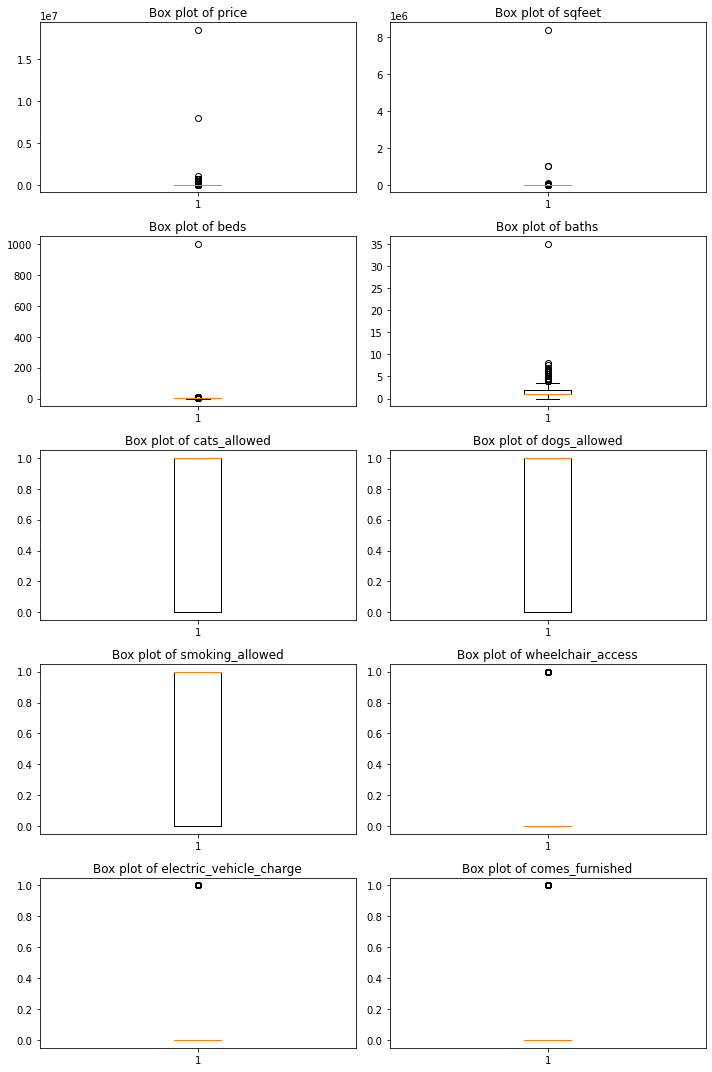

In [75]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 15))

for i in range(10):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.boxplot(df[numeric_cols[i]])
    ax.set_title(f'Box plot of {numeric_cols[i]}')

plt.tight_layout()
plt.show()

In [76]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price,100000.0,1579.44,64330.69,0.0,805.0,1034.0,1395.0,18502000.0
sqfeet,100000.0,1102.97,26903.90,0.0,750.0,949.0,1149.0,8388607.0
beds,100000.0,1.90,3.28,0.0,1.0,2.0,2.0,1000.0
baths,100000.0,1.48,0.60,0.0,1.0,1.0,2.0,35.0
cats_allowed,100000.0,0.73,0.45,0.0,0.0,1.0,1.0,1.0
dogs_allowed,100000.0,0.71,0.45,0.0,0.0,1.0,1.0,1.0
smoking_allowed,100000.0,0.73,0.44,0.0,0.0,1.0,1.0,1.0
wheelchair_access,100000.0,0.08,0.28,0.0,0.0,0.0,0.0,1.0
electric_vehicle_charge,100000.0,0.01,0.11,0.0,0.0,0.0,0.0,1.0
comes_furnished,100000.0,0.05,0.21,0.0,0.0,0.0,0.0,1.0


Looking at the table, there seem to be some potential data issues with the square footage and bedroom columns, and the wide range of prices may require some further investigation.

Let's determine the number of rows in the dataset where the values of 'sqfeet' and 'price' are equal to zero, and subsequently remove those rows. It is necessary to delete these rows as having a value of zero for 'sqfeet' or 'price' does not make sense in the context of our data.

In [77]:
print(len(df[df['sqfeet'] == 0]))
print(len(df[df['price'] == 0]))
df.drop(df[df['price'] == 0].index, inplace=True)
df.drop(df[df['sqfeet'] == 0].index, inplace=True)

10
345


#### Remove Outliers

The Boxplot of our target variable 'price' reveals the presence of outliers. The statistical description of the data shows that the minimum value is 0 and the maximum value is 18,502,000. To address this issue, we removed the 0 values from both the 'price' target variable and the 'sqfeet' feature variable. Additionally, we will use the Interquartile Range (IQR) method to detect and remove outliers since the 'price' target variable and 'sqfeet' feature variable have extreme values.

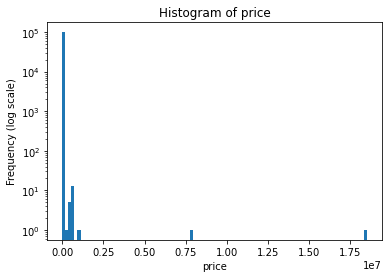

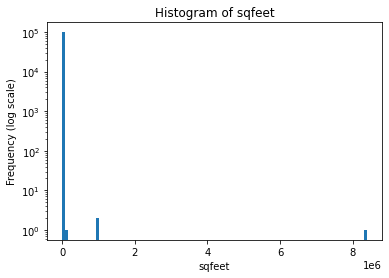

In [78]:
# set the columns you want to create histograms for
columns = ['price', 'sqfeet']

# loop over the columns and create a histogram for each
for col in columns:
    # create the histogram
    plt.hist(df[col], bins=100, log=True)
    
    # set the title and labels for the plot
    plt.title('Histogram of {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Frequency (log scale)')
    
    # show the plot
    plt.show()

In [79]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_bound = np.percentile(df[col], 99)

    outliers = df[df[col] > upper_bound]
    df = df[df[col] <= upper_bound]

    print(f"Upper bound for {col} outliers: {upper_bound}")
    print(f"Number of {col} outliers: {outliers.shape[0]}")

Upper bound for price outliers: 3400.0
Number of price outliers: 988
Upper bound for sqfeet outliers: 2336.0
Number of sqfeet outliers: 986


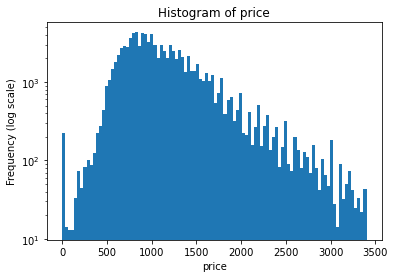

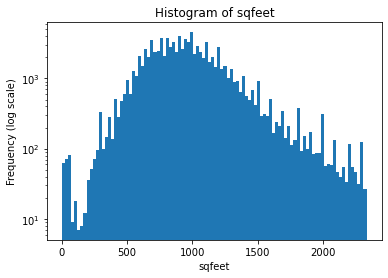

In [80]:
# loop over the columns and create a histogram for each
for col in columns:
    # create the histogram
    plt.hist(df[col], bins=100, log=True)
    
    # set the title and labels for the plot
    plt.title('Histogram of {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Frequency (log scale)')
    
    # show the plot
    plt.show()

In [81]:
print(len(outliers))
df.describe().round(2).T #Standard Dev. is way smaller

986


,count,mean,std,min,25%,50%,75%,max
price,97671.0,1145.03,488.18,1.0,803.0,1025.0,1375.0,3400.0
sqfeet,97671.0,967.95,320.80,1.0,750.0,939.0,1130.0,2336.0
beds,97671.0,1.88,3.30,0.0,1.0,2.0,2.0,1000.0
baths,97671.0,1.46,0.58,0.0,1.0,1.0,2.0,35.0
cats_allowed,97671.0,0.73,0.44,0.0,0.0,1.0,1.0,1.0
dogs_allowed,97671.0,0.71,0.45,0.0,0.0,1.0,1.0,1.0
smoking_allowed,97671.0,0.74,0.44,0.0,0.0,1.0,1.0,1.0
wheelchair_access,97671.0,0.08,0.27,0.0,0.0,0.0,0.0,1.0
electric_vehicle_charge,97671.0,0.01,0.11,0.0,0.0,0.0,0.0,1.0
comes_furnished,97671.0,0.05,0.21,0.0,0.0,0.0,0.0,1.0


The dataset has 97,671 entries, while before 100,000 entries.  However, there are significant differences in the minimum, maximum, and quartile values for the 'price' and 'sqfeet' features, indicating that we successfully deleted the outliers.

Now let's take a look into the columns 'baths' and 'bed':

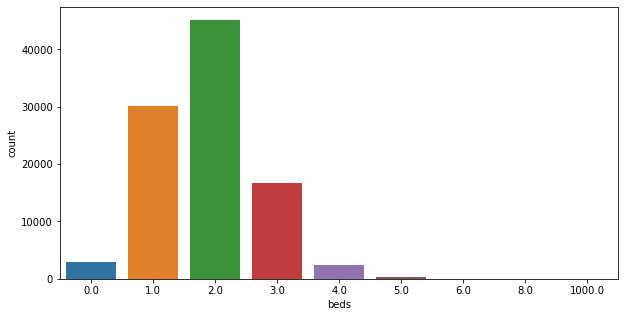

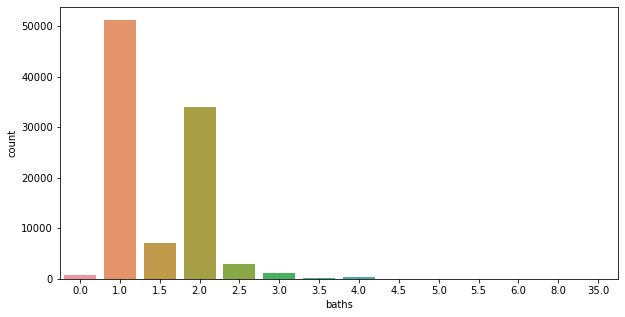

In [82]:
room_cols = df[['beds', 'baths']]
for col in room_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(df[col])

In [83]:
print(len(df[df['baths'] == 35]))
print(len(df[df['beds'] == 1000]))

1
1


As we can see in the graphs above, we have the values 35 for bath ans 1000 for beds, which are clearly outliers. For this reason we are going to delete these rows as it are only one or each value. 

In [84]:
df.drop(df[df['baths'] == 35].index, inplace=True)
df.drop(df[df['beds'] == 1000].index, inplace=True)

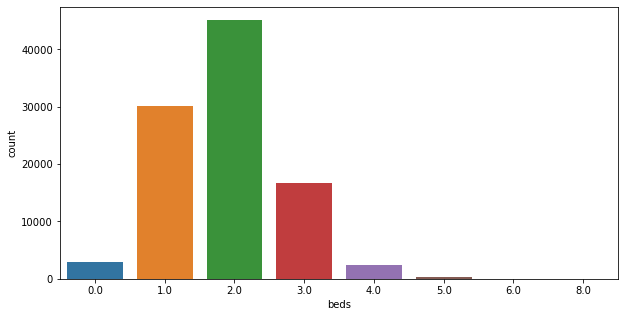

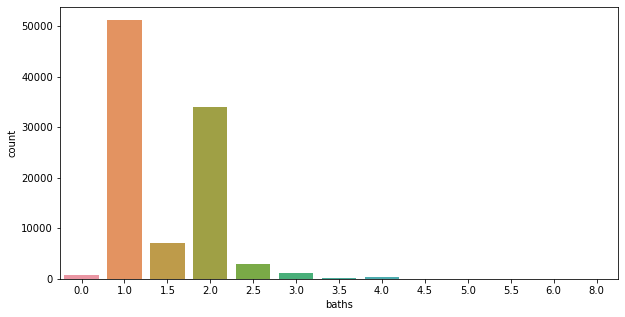

In [85]:
room_cols = df[['beds', 'baths']]
for col in room_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(df[col])

In [86]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price,97670.0,1145.03,488.18,1.0,803.0,1025.0,1375.0,3400.0
sqfeet,97670.0,967.96,320.79,1.0,750.0,939.0,1130.0,2336.0
beds,97670.0,1.87,0.85,0.0,1.0,2.0,2.0,8.0
baths,97670.0,1.46,0.57,0.0,1.0,1.0,2.0,8.0
cats_allowed,97670.0,0.73,0.44,0.0,0.0,1.0,1.0,1.0
dogs_allowed,97670.0,0.71,0.45,0.0,0.0,1.0,1.0,1.0
smoking_allowed,97670.0,0.74,0.44,0.0,0.0,1.0,1.0,1.0
wheelchair_access,97670.0,0.08,0.27,0.0,0.0,0.0,0.0,1.0
electric_vehicle_charge,97670.0,0.01,0.11,0.0,0.0,0.0,0.0,1.0
comes_furnished,97670.0,0.05,0.21,0.0,0.0,0.0,0.0,1.0


In [87]:
df.corr()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
price,1.000000,0.315403,0.160593,0.232662,-0.011567,-0.009794,-0.156704,0.072844,0.118148,-0.012358
sqfeet,0.315403,1.000000,0.759701,0.642282,-0.061372,-0.022358,-0.022956,-0.025407,0.000546,-0.019761
beds,0.160593,0.759701,1.000000,0.623257,-0.061457,-0.028408,0.004725,-0.043937,-0.019756,-0.000052
baths,0.232662,0.642282,0.623257,1.000000,-0.003522,0.032245,-0.007013,0.022872,0.007516,0.032143
cats_allowed,-0.011567,-0.061372,-0.061457,-0.003522,1.000000,0.889248,0.013009,0.120019,0.046191,-0.053130
dogs_allowed,-0.009794,-0.022358,-0.028408,0.032245,0.889248,1.000000,0.009710,0.126429,0.046031,-0.035294
smoking_allowed,-0.156704,-0.022956,0.004725,-0.007013,0.013009,0.009710,1.000000,-0.226566,-0.094194,-0.161265
wheelchair_access,0.072844,-0.025407,-0.043937,0.022872,0.120019,0.126429,-0.226566,1.000000,0.184117,0.201999
electric_vehicle_charge,0.118148,0.000546,-0.019756,0.007516,0.046191,0.046031,-0.094194,0.184117,1.000000,0.065520
comes_furnished,-0.012358,-0.019761,-0.000052,0.032143,-0.053130,-0.035294,-0.161265,0.201999,0.065520,1.000000


In [88]:
correlations = df.corr()['price']
print(correlations)

price                      1.000000
sqfeet                     0.315403
beds                       0.160593
baths                      0.232662
cats_allowed              -0.011567
dogs_allowed              -0.009794
smoking_allowed           -0.156704
wheelchair_access          0.072844
electric_vehicle_charge    0.118148
comes_furnished           -0.012358
Name: price, dtype: float64


Upon examining the correlation matrix, it is evident that the correlation coefficients are higher than the previous matrix. Additionally, the results suggest that sqfeet, beds, and baths have a moderate positive correlation with the target variable (price), while smoking_allowed has a moderate negative correlation. However, the remaining variables demonstrate weak or no correlation with the target variable.

## Feature engineering

#### Checking if types are categorical and transforming it to numerical & transforming binary columns to integer

In [89]:
df.dtypes

region                      object
price                      float64
type                        object
sqfeet                     float64
beds                       float64
baths                      float64
cats_allowed               float64
dogs_allowed               float64
smoking_allowed            float64
wheelchair_access          float64
electric_vehicle_charge    float64
comes_furnished            float64
laundry_options             object
parking_options             object
state                       object
dtype: object

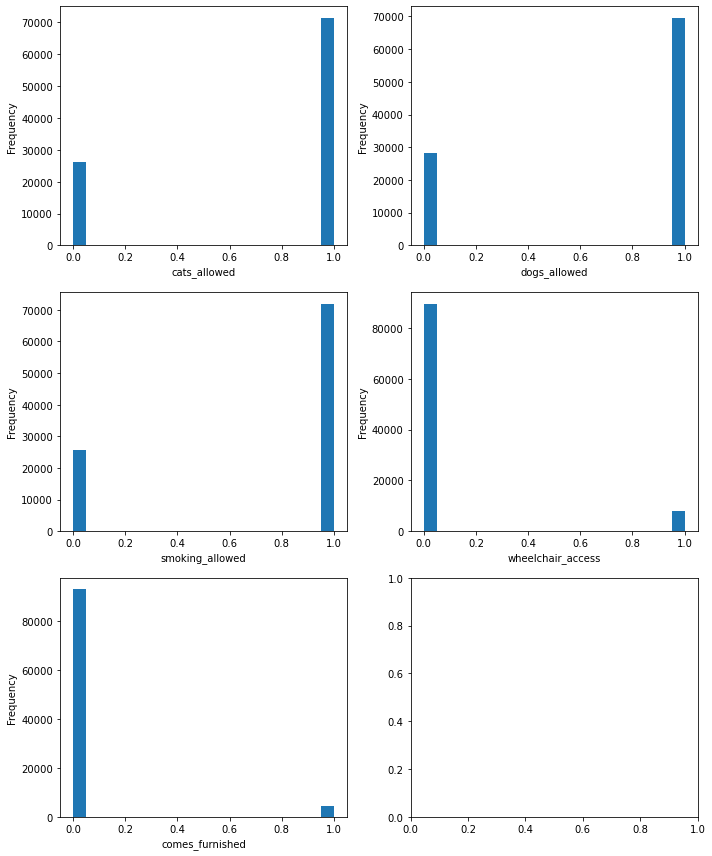

In [90]:
# create a figure with subplots for each column
fig, axs = plt.subplots(3, 2, figsize=(10, 12))
axs = axs.flatten()

# plot histograms of the columns
for i, col in enumerate(['cats_allowed', 'dogs_allowed','smoking_allowed','wheelchair_access','comes_furnished']):
    axs[i].hist(df[col], bins=20)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [91]:
# convert binary categorical variables from float to integers
df['cats_allowed'] = df['cats_allowed'].astype(int)
df['dogs_allowed'] = df['dogs_allowed'].astype(int)
df['smoking_allowed'] = df['smoking_allowed'].astype(int)
df['wheelchair_access'] = df['wheelchair_access'].astype(int)
df['comes_furnished'] = df['comes_furnished'].astype(int)

We convert the binary categorical variables from float to integer. This will make it easier to work with them later on.

### Splitting the data

In [92]:
df = df.rename(columns={'price': 'target'})

In [93]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='target')
y=df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

**Pipeline including Column Transformer**

The pipeline consists of four main steps:

1) We use the OneHotEncoder transformer from the category_encoders library to convert categorical features represented as strings into numerical features. This is applied to the columns specified in the one_hot_cols list.

2) Transformers are defined for each column type. For categorical columns, TargetEncoder() from the category_encoders library is used to perform target encoding on region and state columns. This helps us to capture the relationship between the categorical feature and the target variable.

3) For continuous features, we first impute missing values using the median value of the feature and then standardize them using the StandardScaler transformer from the sklearn library. This is applied to the columns specified in the continuous_cols list. Scaling ensures that all continuous features are on the same scale, facilitating the algorithm in learning the correct weights and biases for each feature.

4) We use a feature selector to choose the best features with f_regression scoring function via SelectKBest. We set k to "all" to include all features, reducing dataset dimensionality, preventing overfitting, and retaining the most informative features. f_regression is used to select continuous features based on their correlation with the target variable.We chose the f_regression scoring function as it is a suitable method for selecting continuous features.

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import category_encoders as ce

In [42]:
# define the columns to encode and scale
one_hot_cols = ['laundry_options', 'type', 'parking_options']
target_encode_cols = ['state', 'region']
continuous_cols = ['sqfeet', 'beds', 'baths']

# define the transformers for each column type
one_hot_transformer = ce.OneHotEncoder(cols=one_hot_cols)
target_encode_transformer = ce.TargetEncoder(cols=target_encode_cols)
continuous_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# combine the transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', one_hot_transformer, one_hot_cols),
        ('target_encode', target_encode_transformer, target_encode_cols),
        ('num', continuous_transformer, continuous_cols)],
    remainder='passthrough')

# define the feature selector
selector = SelectKBest(score_func=f_regression, k="all")

## Modeling

In the following models we perform hyperparameter tuning using grid search with cross-validation. The training data is divided into 5 folds and the model is trained on 4 folds and validated on the remaining 1 fold. This process is repeated 5 times, with each fold being used as the validation set once.

The X_test and y_test data are not used for testing the model during this process. Instead, the mean squared error (MSE) score obtained from the cross-validation is used as an estimate of the model's performance on unseen data.

This approach is used to prevent overfitting to the test set and obtaining optimistic estimates of the model's performance on unseen data during the hyperparameter tuning process. The X_test and y_test data should only be used as a final evaluation of the model after the hyperparameters have been tuned and the model has been trained on the entire training set.

#### Linear Regression, Lasso and Ridge

We used Linear Regression, Lasso, and Ridge as our initial models for predicting house prices because they can handle both categorical and continuous features. Linear Regression serves as a simple and straightforward model that sets a baseline performance for house price prediction. However, it may overfit the model if there are too many features or if the features are highly correlated.

On the other hand, Lasso and Ridge regression are regularized linear regression models that can address overfitting by adding a penalty term to the objective function. Ridge regression can mitigate the impact of highly correlated features by shrinking their coefficients towards each other. We chose these models for house prediction because they can provide more stable and understandable results compared to other complex models.

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

In [44]:
# define the models
linear = LinearRegression()
ridge = Ridge(alpha=0.5)
lasso = Lasso(alpha=0.5)

# define the pipelines
pipeline_linear = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('estimator', linear)])

pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('estimator', ridge)])

pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('estimator', lasso)])

# define the hyperparameters to search
param_grid = [    {        'estimator': [Ridge()],
        'estimator__alpha': [0.01, 0.1, 1, 10, 100]
    },
    {
        'estimator': [Lasso()],
        'estimator__alpha': [0.01, 0.1, 1, 10, 100]
    }
]

# Create a GridSearchCV object to perform the search
grid_search = GridSearchCV(pipeline_linear, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)
print('Best R2:', grid_search.best_estimator_.score(X_train, y_train))

# evaluate each model using cross-validation
scores_linear = cross_val_score(pipeline_linear, X_train, y_train, cv=5, scoring='r2')
scores_ridge = cross_val_score(pipeline_ridge, X_train, y_train, cv=5, scoring='r2')
scores_lasso = cross_val_score(pipeline_lasso, X_train, y_train, cv=5, scoring='r2')

# print the R-squared score of each model
print("Linear Regression CV R-squared:", scores_linear.mean())
print("Ridge Regression CV R-squared:", scores_ridge.mean())
print("Lasso Regression CV R-squared:", scores_lasso.mean())

# compute the mean squared error of each model
mse_linear = -cross_val_score(pipeline_linear, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
mse_ridge = -cross_val_score(pipeline_ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
mse_lasso = -cross_val_score(pipeline_lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

# print the mean squared error of each model
print("Linear Regression CV MSE:", mse_linear)
print("Ridge Regression CV MSE:", mse_ridge)
print("Lasso Regression CV MSE:", mse_lasso)

# compute the root mean squared error of each model
rmse_linear = mse_linear ** 0.5
rmse_ridge = mse_ridge ** 0.5
rmse_lasso = mse_lasso ** 0.5

# print the root mean squared error of each model
print("Linear Regression CV RMSE:", rmse_linear)
print("Ridge Regression CV RMSE:", rmse_ridge)
print("Lasso Regression CV RMSE:", rmse_lasso)

Best parameters: {'estimator': Ridge(alpha=10), 'estimator__alpha': 10}
Best score: 80910.81379267569
Best R2: 0.6639979176072517
Linear Regression CV R-squared: 0.6596022962589558
Ridge Regression CV R-squared: 0.6596037211289001
Lasso Regression CV R-squared: 0.6583845055224684
Linear Regression CV MSE: 80912.63286136749
Ridge Regression CV MSE: 80912.303612306
Lasso Regression CV MSE: 81203.67982778154
Linear Regression CV RMSE: 284.4514595873389
Ridge Regression CV RMSE: 284.45088084290757
Lasso Regression CV RMSE: 284.9625937343032


These metrics allow us to compare the performance of each model and determine which one has the best fit for predicting house prices we can see that ridge has the best sores.

After defining the pipeline, we defined a hyperparameter grid to search for the best hyperparameters for the Ridge and Lasso models. The GridSearchCV object is then created to perform the hyperparameter search using cross-validation with five folds. We can see above the best combination of hyperparameters selected based on the highest score, and the best estimator.

#### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor
from math import sqrt

We chose the decision tree algorithm for predicting house prices due to several reasons. Firstly, decision trees are easy to understand and interpret, providing transparent results that can be visualized. Secondly, decision trees can handle both categorical and numerical features, making them versatile for various types of datasets. Thirdly, decision trees can capture non-linear relationships between features, allowing them to detect complex patterns that other models may miss.

In [46]:
# define the final estimator
estimator = DecisionTreeRegressor(random_state=42)

# define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('estimator', estimator)
])

# define the grid of hyperparameters to search
param_grid = {
    'estimator__max_depth': [None, 5, 10, 20],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': ['auto', 'sqrt', 'log2']
}

# define the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# fit the pipeline to the data using cross-validation
grid_search.fit(X_train, y_train)

# print the R-squared score of the model using cross-validation
r2 = grid_search.best_estimator_.score(X_train, y_train)
print("CV R-squared:", r2)

# print the mean squared error of the model using cross-validation
mse = -grid_search.best_score_
print("CV MSE:", mse)

# print the root mean squared error of the model using cross-validation
rmse = sqrt(mse)
print("CV RMSE:", rmse)

# print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters:", grid_search.best_params_)
print("Best MSE:", mse)

CV R-squared: 0.8991066313159047
CV MSE: 66344.16241868507
CV RMSE: 257.57360582692684
Best hyperparameters: {'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__min_samples_leaf': 4}
Best MSE: 66344.16241868507


Based on the R-squared score and the RMSE, the decision tree model appears to perform better than the linear regression, ridge regression, and lasso regression models. The decision tree has the highest R-squared score of 0.7059, indicating that it explains more variance in the target variable than the other models. Additionally, the decision tree has the lowest RMSE of 266.079, indicating that it has the smallest prediction error compared to the other models. Therefore, the decision tree model is the best choice for this particular problem yet.

#### Esemble Random Forest

As the decision tree showed promising results, we decided to utilize random forest as an ensemble method. Random forest combines multiple decision trees to improve accuracy and reduce overfitting. This is particularly important in house price prediction, where multiple variables can impact the outcome.

Random forest is also robust to outliers, which is beneficial for extreme values. Therefore, random forest is a suitable model for predicting house prices.

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
# define the final estimator
estimator = RandomForestRegressor(n_estimators=100, random_state=42)

# define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('estimator', estimator)])

# define the grid of hyperparameters to search
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20, 30]
}

# define the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

# calculate and print the cross-validation scores
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation scores:", cv_scores)
print("Mean CV R-squared:", cv_scores.mean())

# fit the pipeline to the train data
grid_search.best_estimator_.fit(X_train, y_train)

# make predictions using the fitted pipeline on the train data
y_pred_train = grid_search.best_estimator_.predict(X_train)

# print the R-squared score of the model on the train data
print("Train R-squared:", grid_search.best_estimator_.score(X_train, y_train))

# print the mean squared error of the model on the train data
mse_train = mean_squared_error(y_train, y_pred_train)
print("Train MSE:", mse_train)

# print the root mean squared error of the model on the train data
rmse_train = mse_train ** 0.5
print("Train RMSE:", rmse_train)

Best hyperparameters: {'estimator__max_depth': None, 'estimator__n_estimators': 200}
Best MSE: 44366.290039228916
Cross-validation scores: [0.81911684 0.81602733 0.81280794 0.80402926 0.81460982]
Mean CV R-squared: 0.8133182382519525
Train R-squared: 0.9715164397781273
Train MSE: 6771.005880361802
Train RMSE: 82.28612203987865


Random forest has the best score compared to the rest yet.

The model had an RMSE of 82.28 on the Train Data, indicating an average error of about $82.28, which is relatively small compared to the average house price. The model also had an exellent test R-squared score of 0.97, explaining about 97.1% of the variance in the train data. The train MSE was 6771.00, useful for evaluating and comparing the model's performance.

#### Gradient Boosting Regressor

We choose Gradient Boosting because it builds an ensemble of decision trees, just like Random Forest, but instead of building trees independently, it builds them sequentially, with each new tree correcting the errors of the previous ones. This can lead to a highly accurate model with lower bias and variance compared to single decision trees.

Furthermore, Gradient Boosting allows for fine-tuning of the model through the adjustment of hyperparameters, such as the learning rate, the maximum depth of the trees, and the number of estimators, which can improve the accuracy of the model.

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
# define the final estimator
estimator = GradientBoostingRegressor(random_state=42)

# define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('estimator', estimator)])

# define the hyperparameters to tune
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [7, 10, 20],
    'estimator__max_features': ['sqrt', 'log2']
}

# create a grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# make predictions using the fitted pipeline on the train data
y_pred_train = grid_search.best_estimator_.predict(X_train)

# calculate the root mean squared error (RMSE) of the predictions
rmse = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE:", rmse)

# print the R-squared score of the model on the training data
print("Train R-squared:", grid_search.best_estimator_.score(X_train, y_train))

# print the mean squared error of the model on the training data
mse = mean_squared_error(y_train, y_pred_train)
print("Training MSE:", mse)

# print the root mean squared error of the model on the training data
print("Training RMSE:", rmse)

Best Hyperparameters: {'estimator__max_depth': 20, 'estimator__max_features': 'sqrt', 'estimator__n_estimators': 100}
RMSE: 41.11529711415431
Train R-squared: 0.9928887172517717
Training MSE: 1690.4676567851857
Training RMSE: 41.11529711415431


## Neural Network

In [94]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras import layers

In [95]:
X_train.dtypes

region                      object
type                        object
sqfeet                     float64
beds                       float64
baths                      float64
cats_allowed                 int32
dogs_allowed                 int32
smoking_allowed              int32
wheelchair_access            int32
electric_vehicle_charge    float64
comes_furnished              int32
laundry_options             object
parking_options             object
state                       object
dtype: object

In [96]:
import category_encoders as ce

# Define the columns to target encode
target_encode_cols = ['state', 'region']

# Create a TargetEncoder object
te = ce.TargetEncoder(cols=target_encode_cols)

# Fit and transform the DataFrame using target encoding
df = te.fit_transform(df, y)
# Use one-hot encoding to encode the 'laundry_options' and 'parking_options' columns
df = pd.get_dummies(df, columns=['laundry_options', 'parking_options','type'])
from sklearn.preprocessing import StandardScaler

# Define the features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
df.dtypes

region                                float64
target                                float64
sqfeet                                float64
beds                                  float64
baths                                 float64
cats_allowed                            int32
dogs_allowed                            int32
smoking_allowed                         int32
wheelchair_access                       int32
electric_vehicle_charge               float64
comes_furnished                         int32
state                                 float64
laundry_options_laundry in bldg         uint8
laundry_options_laundry on site         uint8
laundry_options_no laundry on site      uint8
laundry_options_unknown                 uint8
laundry_options_w/d hookups             uint8
laundry_options_w/d in unit             uint8
parking_options_attached garage         uint8
parking_options_carport                 uint8
parking_options_detached garage         uint8
parking_options_no parking        

In [100]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# split dataset into features and target
X = df.drop(columns='target')
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the model architecture of the Neural Network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss='mse',
              metrics=['mae', 'mse'])

# Define early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, callbacks=[early_stop])

# Find the optimal epoch
optimal_epoch = np.argmin(history.history['val_loss']) + 1

# Predict on new data
predictions = model.predict(X_train)

# Evaluate the model
mse, mae, mse = model.evaluate(X_test, y_test, verbose=0)


# Calculate RMSE and MSE
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
mse = mean_squared_error(y_test, model.predict(X_test))

# Print the metrics
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("Optimal epoch:", optimal_epoch)

Epoch 1/150
2442/2442 [==============================] - 7s 2ms/step - loss: 102912.3828 - mae: 226.3650 - mse: 102912.3828 - val_loss: 96481.8594 - val_mae: 217.4208 - val_mse: 96481.8594
Epoch 2/150
2442/2442 [==============================] - 5s 2ms/step - loss: 94166.2578 - mae: 214.4147 - mse: 94166.2578 - val_loss: 98910.0391 - val_mae: 232.8836 - val_mse: 98910.0391
Epoch 3/150
2442/2442 [==============================] - 5s 2ms/step - loss: 88020.5469 - mae: 204.6804 - mse: 88020.5469 - val_loss: 84853.0859 - val_mae: 202.2027 - val_mse: 84853.0859
Epoch 4/150
2442/2442 [==============================] - 5s 2ms/step - loss: 85436.2500 - mae: 200.9720 - mse: 85436.2500 - val_loss: 84444.5312 - val_mae: 195.2660 - val_mse: 84444.5312
Epoch 5/150
2442/2442 [==============================] - 5s 2ms/step - loss: 84735.6172 - mae: 200.0390 - mse: 84735.6172 - val_loss: 83324.2734 - val_mae: 197.1528 - val_mse: 83324.2734
Epoch 6/150
2442/2442 [==============================] - 5s 2ms

2442/2442 [==============================] - 5s 2ms/step - loss: 77220.4141 - mae: 187.5824 - mse: 77220.4141 - val_loss: 76243.1562 - val_mae: 185.0841 - val_mse: 76243.1562
Epoch 45/150
2442/2442 [==============================] - 5s 2ms/step - loss: 76917.1719 - mae: 186.9761 - mse: 76917.1719 - val_loss: 76116.9844 - val_mae: 183.8396 - val_mse: 76116.9844
Epoch 46/150
2442/2442 [==============================] - 5s 2ms/step - loss: 77206.9766 - mae: 187.8512 - mse: 77206.9766 - val_loss: 77875.7891 - val_mae: 190.2554 - val_mse: 77875.7891
Epoch 47/150
2442/2442 [==============================] - 5s 2ms/step - loss: 77011.0469 - mae: 187.2275 - mse: 77011.0469 - val_loss: 79739.2109 - val_mae: 186.9191 - val_mse: 79739.2109
Epoch 48/150
2442/2442 [==============================] - 5s 2ms/step - loss: 77066.9219 - mae: 187.4449 - mse: 77066.9219 - val_loss: 79317.5156 - val_mae: 193.1035 - val_mse: 79317.5156
Epoch 49/150
2442/2442 [==============================] - 5s 2ms/step - l

The model is compiled using the Adam optimizer with a learning rate of 0.001, and the mean squared error (MSE) loss function is used. During training, the model's performance is monitored on the validation set, and the training is stopped early if the validation loss doesn't improve after 150 epochs using the EarlyStopping callback. We can see that the results are not better than the one of the model previously done gradientboosting.

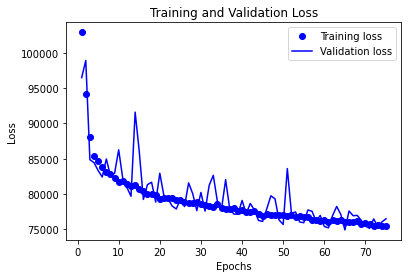

In [101]:
import matplotlib.pyplot as plt

# plot training and validation loss over epochs
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This code trains a neural network using Keras and TensorFlow to predict a target variable. It iterates over different values for the number of nodes and epochs and trains a new model for each combination.

For each model, it evaluates performance on a validation dataset using the mean squared error (MSE), mean absolute error (MAE), and R-squared metrics.

## Model evaluation

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt

# define the final estimator with the best parameters
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=20, max_features= 'sqrt',random_state=42)

# define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('estimator', gbr)])

# fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# make predictions on the test set
y_pred = pipeline.predict(X_test)

# evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = pipeline.score(X_test, y_test)

print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test R-squared:", r2)

Test MSE: 40508.61703547269
Test RMSE: 201.26752603307045
Test R-squared: 0.8317252803291668


In this project, we built a machine learning model for predicting house rental prices based on various features such as location, number of bedrooms, bathrooms, and other amenities. The model was trained on a dataset containing information about past house rentals, and hyperparameters were tuned using grid search with cross-validation.

After training and tuning the model, it was evaluated using the test set, which contained unseen data. The final results obtained from the test set were a Test MSE of 40508.62, Test RMSE of 201.27, and Test R-squared of 0.8317. These metrics indicate that the model is performing well and is able to make accurate predictions for house rental prices.

The model can be used by real estate agents, landlords, and tenants to estimate the rental price of a house based on its features and location. This can help in making informed decisions about pricing and renting properties. Overall, the machine learning model developed in this project can be a valuable tool for the real estate industry.

## Interpretability of the final model

In [53]:
from sklearn.inspection import permutation_importance

In [54]:
perm_pipe = permutation_importance(pipeline, X_train, y_train, n_repeats=30, random_state=0, n_jobs=-1)

The feat_import_perm variable contains the resulting feature importances calculated as the mean decrease in model performance when each feature is permuted.

#### The bar plot display the feature importances

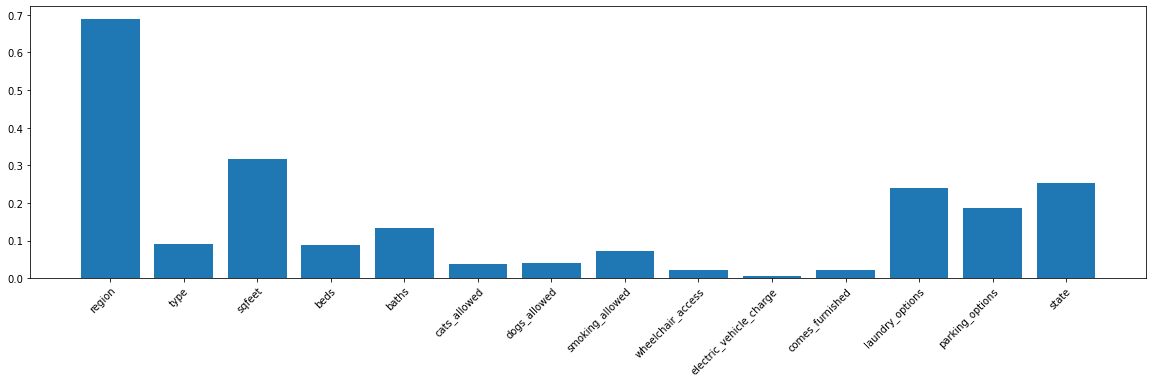

In [55]:
feat_import_perm = perm_pipe.importances_mean
fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(range(len(feat_import_perm)), feat_import_perm, align="center")
ax.set(xticks=range(len(feat_import_perm)), xticklabels=X_train.columns)
# Set properties of x axis using setp, we will rotate the labels by 45 degrees
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

<AxesSubplot:>

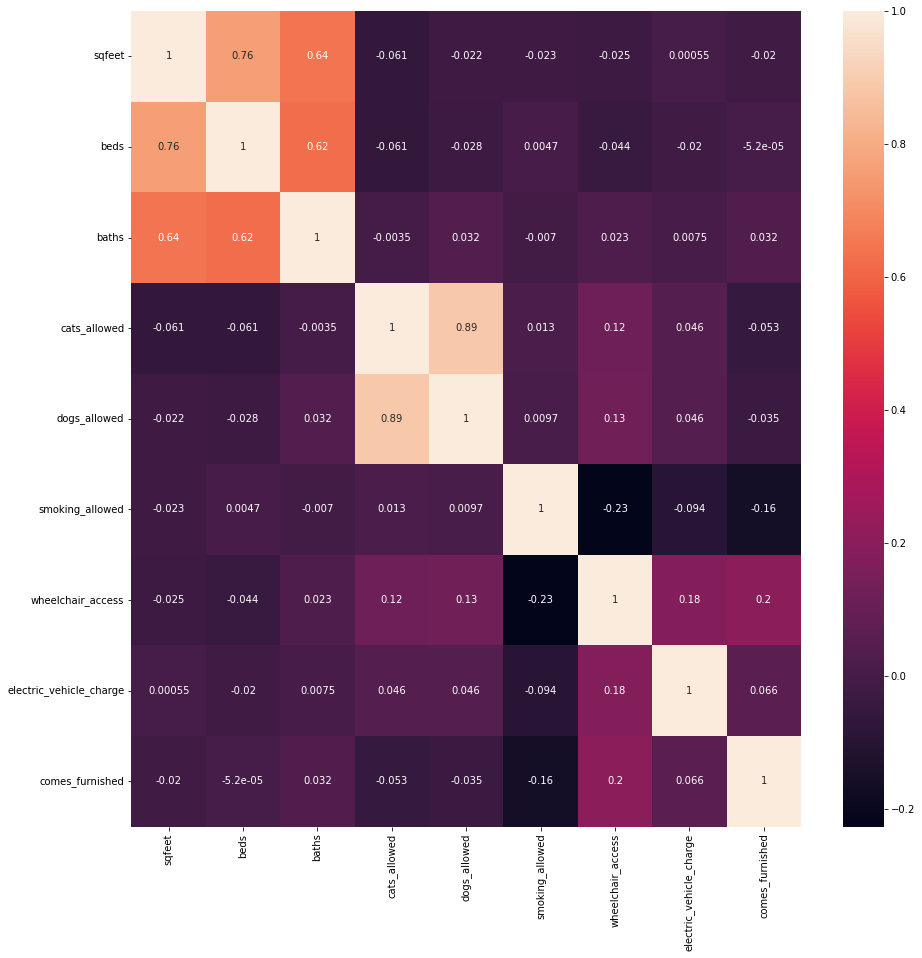

In [56]:
fig, ax = plt.subplots(figsize=(15,15)) 
corrMatrix=df.drop(columns='target').corr()
sns.heatmap(corrMatrix, annot=True)

In [59]:
explainer_pipe = shap.TreeExplainer(pipeline.named_steps['estimator'])

In [60]:
X_test_transformed=pipeline.named_steps['preprocessor'].transform(X_test)

In [61]:
data_for_prediction = X_test_transformed[20]  

#### This code is used to plot the feature importance of the decision tree model.

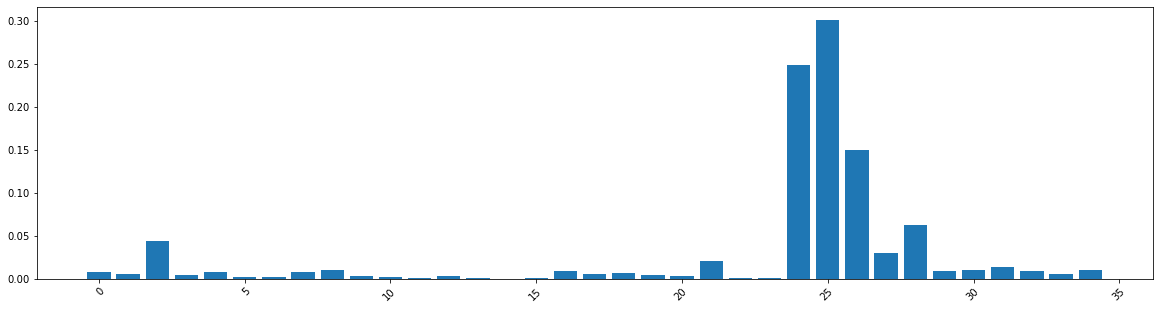

In [62]:
feat_import_gini = pipeline.named_steps['estimator'].feature_importances_
fig, ax = plt.subplots(figsize=(20, 5))
ax.bar(range(len(feat_import_gini)), feat_import_gini, align="center")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()

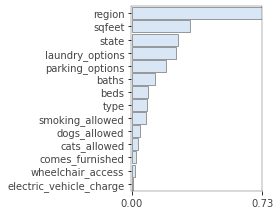

In [57]:
from rfpimp import importances, plot_importances
imp = importances(pipeline, X_train, y_train)
viz = plot_importances(imp)
viz.view()

We can easily notice which features are important. To reuse the model in real-life scenarios with new data, we should at least have the variables region, sqfeet, state, laundry_option, pThe machine learning model developed in this project can be implemented in real life by integrating it into a web or mobile application that allows real estate agents, landlords, and tenants to input the features and location of a house and receive a rental price estimate. This can help streamline the rental process and provide more accurate rental prices.

The importance of the features can also be used to guide property owners in making renovations or improvements that can increase the rental value of their properties. For example, if the model indicates that the number of bedrooms is the most important factor in determining rental price, a property owner may consider adding a bedroom to their property to increase its rental value.

In order to reuse the model with new data, it is important to have at least the variables region, sqfeet, state, laundry_option, parking_options, baths, beds, and type. These variables can be easily obtained from property listings or through a user-input interface in an application. By regularly updating the data used to train the model, the model's accuracy can be improved over time.arking_options, baths, beds, and type.